## FB Prophet Quick Start

> https://facebook.github.io/prophet/docs/quick_start.html#python-api
---

In [1]:
import pandas as pd
from prophet import Prophet

/Users/shaunaksen/miniconda3/envs/shaunak_personal/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("/Users/shaunaksen/Documents/personal-projects/DS-ML-Concepts/Time Series Analysis/using_prophet/data/example_wp_log_peyton_manning.csv")
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [3]:
df.shape

(2905, 2)

In [4]:
df['ds'].min(), df['ds'].max()

('2007-12-10', '2016-01-20')

We fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then you call its fit method and pass in the historical dataframe. Fitting should take 1-5 seconds.



In [5]:
m = Prophet()
m.fit(df)

10:24:22 - cmdstanpy - INFO - Chain [1] start processing
10:24:22 - cmdstanpy - INFO - Chain [1] done processing


Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model fit as well.

In [6]:
future = m.make_future_dataframe(periods=365, freq='D', include_history=True)

In [7]:
df['ds'].min(), df['ds'].max(), future['ds'].min(), future['ds'].max()

('2007-12-10',
 '2016-01-20',
 Timestamp('2007-12-10 00:00:00'),
 Timestamp('2017-01-19 00:00:00'))

In [8]:
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


The predict method will assign each row in future a predicted value which it names `yhat`. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column `yhat` with the forecast, as well as columns for components and uncertainty intervals.



In [9]:
forecast = m.predict(df=future)

In [10]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.034908,8.212367,9.444568,8.034908,8.034908,0.802953,0.802953,0.802953,0.352291,0.352291,0.352291,0.450662,0.450662,0.450662,0.0,0.0,0.0,8.837861
1,2007-12-11,8.033381,8.047889,9.247317,8.033381,8.033381,0.553051,0.553051,0.553051,0.119618,0.119618,0.119618,0.433434,0.433434,0.433434,0.0,0.0,0.0,8.586432
2,2007-12-12,8.031853,7.773709,9.032044,8.031853,8.031853,0.350484,0.350484,0.350484,-0.066658,-0.066658,-0.066658,0.417141,0.417141,0.417141,0.0,0.0,0.0,8.382337
3,2007-12-13,8.030326,7.753820,8.976817,8.030326,8.030326,0.329951,0.329951,0.329951,-0.072277,-0.072277,-0.072277,0.402228,0.402228,0.402228,0.0,0.0,0.0,8.360277
4,2007-12-14,8.028799,7.757452,8.975115,8.028799,8.028799,0.319535,0.319535,0.319535,-0.069564,-0.069564,-0.069564,0.389100,0.389100,0.389100,0.0,0.0,0.0,8.348334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2017-01-15,7.185960,7.463839,8.957221,6.874917,7.544915,1.018279,1.018279,1.018279,0.048295,0.048295,0.048295,0.969984,0.969984,0.969984,0.0,0.0,0.0,8.204239
3266,2017-01-16,7.184929,7.807507,9.240286,6.872431,7.546146,1.344302,1.344302,1.344302,0.352291,0.352291,0.352291,0.992010,0.992010,0.992010,0.0,0.0,0.0,8.529231
3267,2017-01-17,7.183899,7.607367,9.033588,6.870349,7.547378,1.132712,1.132712,1.132712,0.119618,0.119618,0.119618,1.013095,1.013095,1.013095,0.0,0.0,0.0,8.316611
3268,2017-01-18,7.182869,7.480178,8.882449,6.868286,7.548404,0.966375,0.966375,0.966375,-0.066658,-0.066658,-0.066658,1.033033,1.033033,1.033033,0.0,0.0,0.0,8.149244


In [11]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [12]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.204239,7.463839,8.957221
3266,2017-01-16,8.529231,7.807507,9.240286
3267,2017-01-17,8.316611,7.607367,9.033588
3268,2017-01-18,8.149244,7.480178,8.882449
3269,2017-01-19,8.161142,7.433403,8.858400


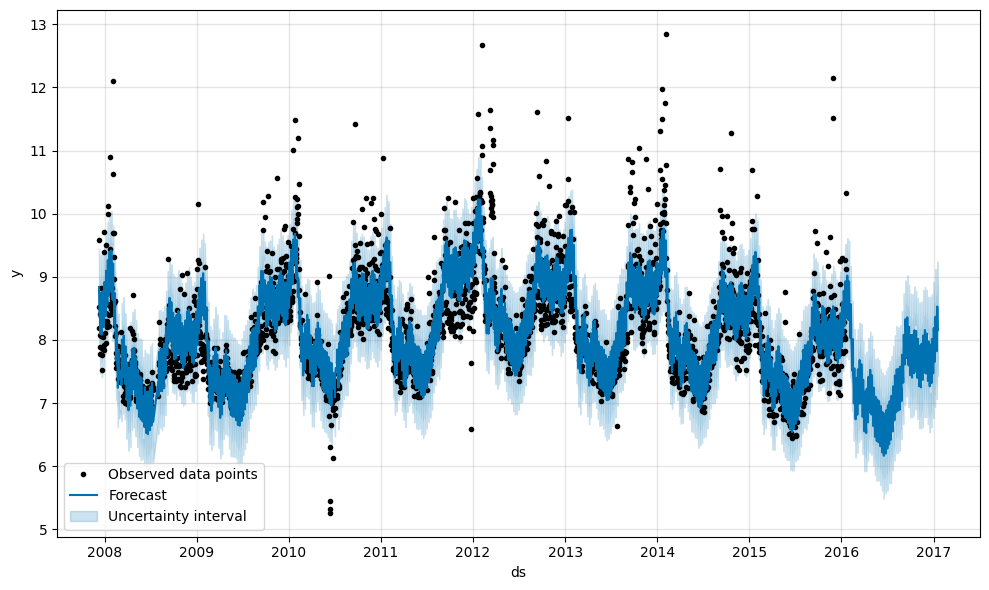

In [13]:
fig1 = m.plot(forecast, include_legend=True)

If you want to see the forecast components, you can use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.



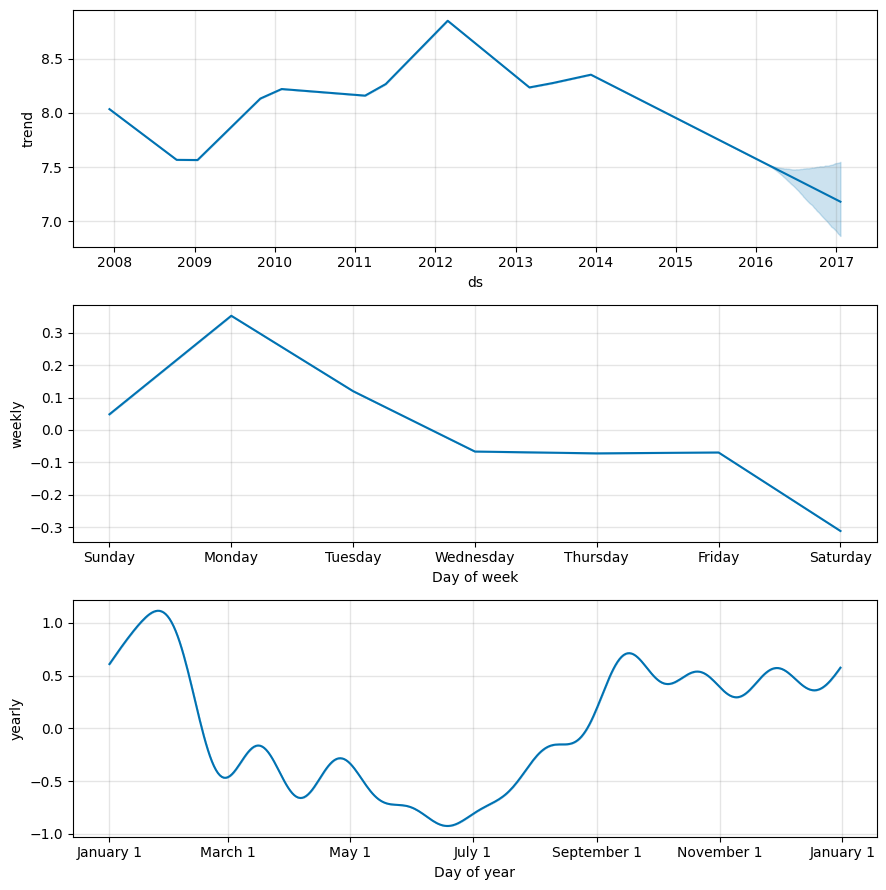

In [14]:
fig2 = m.plot_components(forecast)


An interactive figure of the forecast and components can be created with plotly. You will need to install plotly 4.0 or above separately, as it will not by default be installed with prophet. You will also need to install the notebook and ipywidgets packages.



In [15]:
from prophet.plot import plot_plotly, plot_components_plotly

In [16]:
plot_components_plotly(m, forecast)
